# Finding Symbolic Defaults

We have two answer to questions:
 1. **By which method can we find good Symbolic Defaults? And what are they?**
 2. Can we find good (i.e. better than currently known) symbolic defaults?
 
This notebook addresses the first question.

**important**: Currently specifically the notebook only addresses the second part of the first question.

---

## 0. The evolutionary optimization
The following operators were considered:
 - unary: `expit, neg`
 - binary: `add, sub, mul, div, pow, max, min`
 
The following inputs were considered:
 - m: number of classes
 - p: number of features
 - n: number of instances
 - mkd: median kernel distance (todo: add link)
 - mcp: majority class ratio (`majority class count / n`)
 - rc: ratio of symbolic features (`number of symbolic features / p`)
 - xvar: variance as calculated on the full data as if it was a single sequence (used in the scikit-learn 0.22 default of SVC).
 - random constants:
     - random choice of {2^i | i int from [-8, .., 8]}
     - random choice of an int in [1, 10]
     - random choice of float in [0, 1]
     
The symbolic defaults were optimized together.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_result(result, ax, correct=False):    
    max_score_per_gen = [float(gen.score_max) for gen in result.information_by_generation]
    if correct:
        max_score_per_gen = [s/0.9 for s in max_score_per_gen]
    ax.plot(range(result.n_generations_elapsed), max_score_per_gen)
    ax.set_ylim([0.7, 1.])
    ax.set_xlim([0, 100])
    ax.set_title(result.task)

# 1. SVC

## 1.1 RBF

In [77]:
from visualization.output_parser import parse_eo_console_output
results = parse_eo_console_output("data/results/rbf_1l_rNone_mNone")
results2 = parse_eo_console_output("data/results/rbf_ml_r9_mNone")

The following plots show the internal fitness score. The internal fitness score is the average of scores predicted by the surrogate model across all tasks except the indicated one.

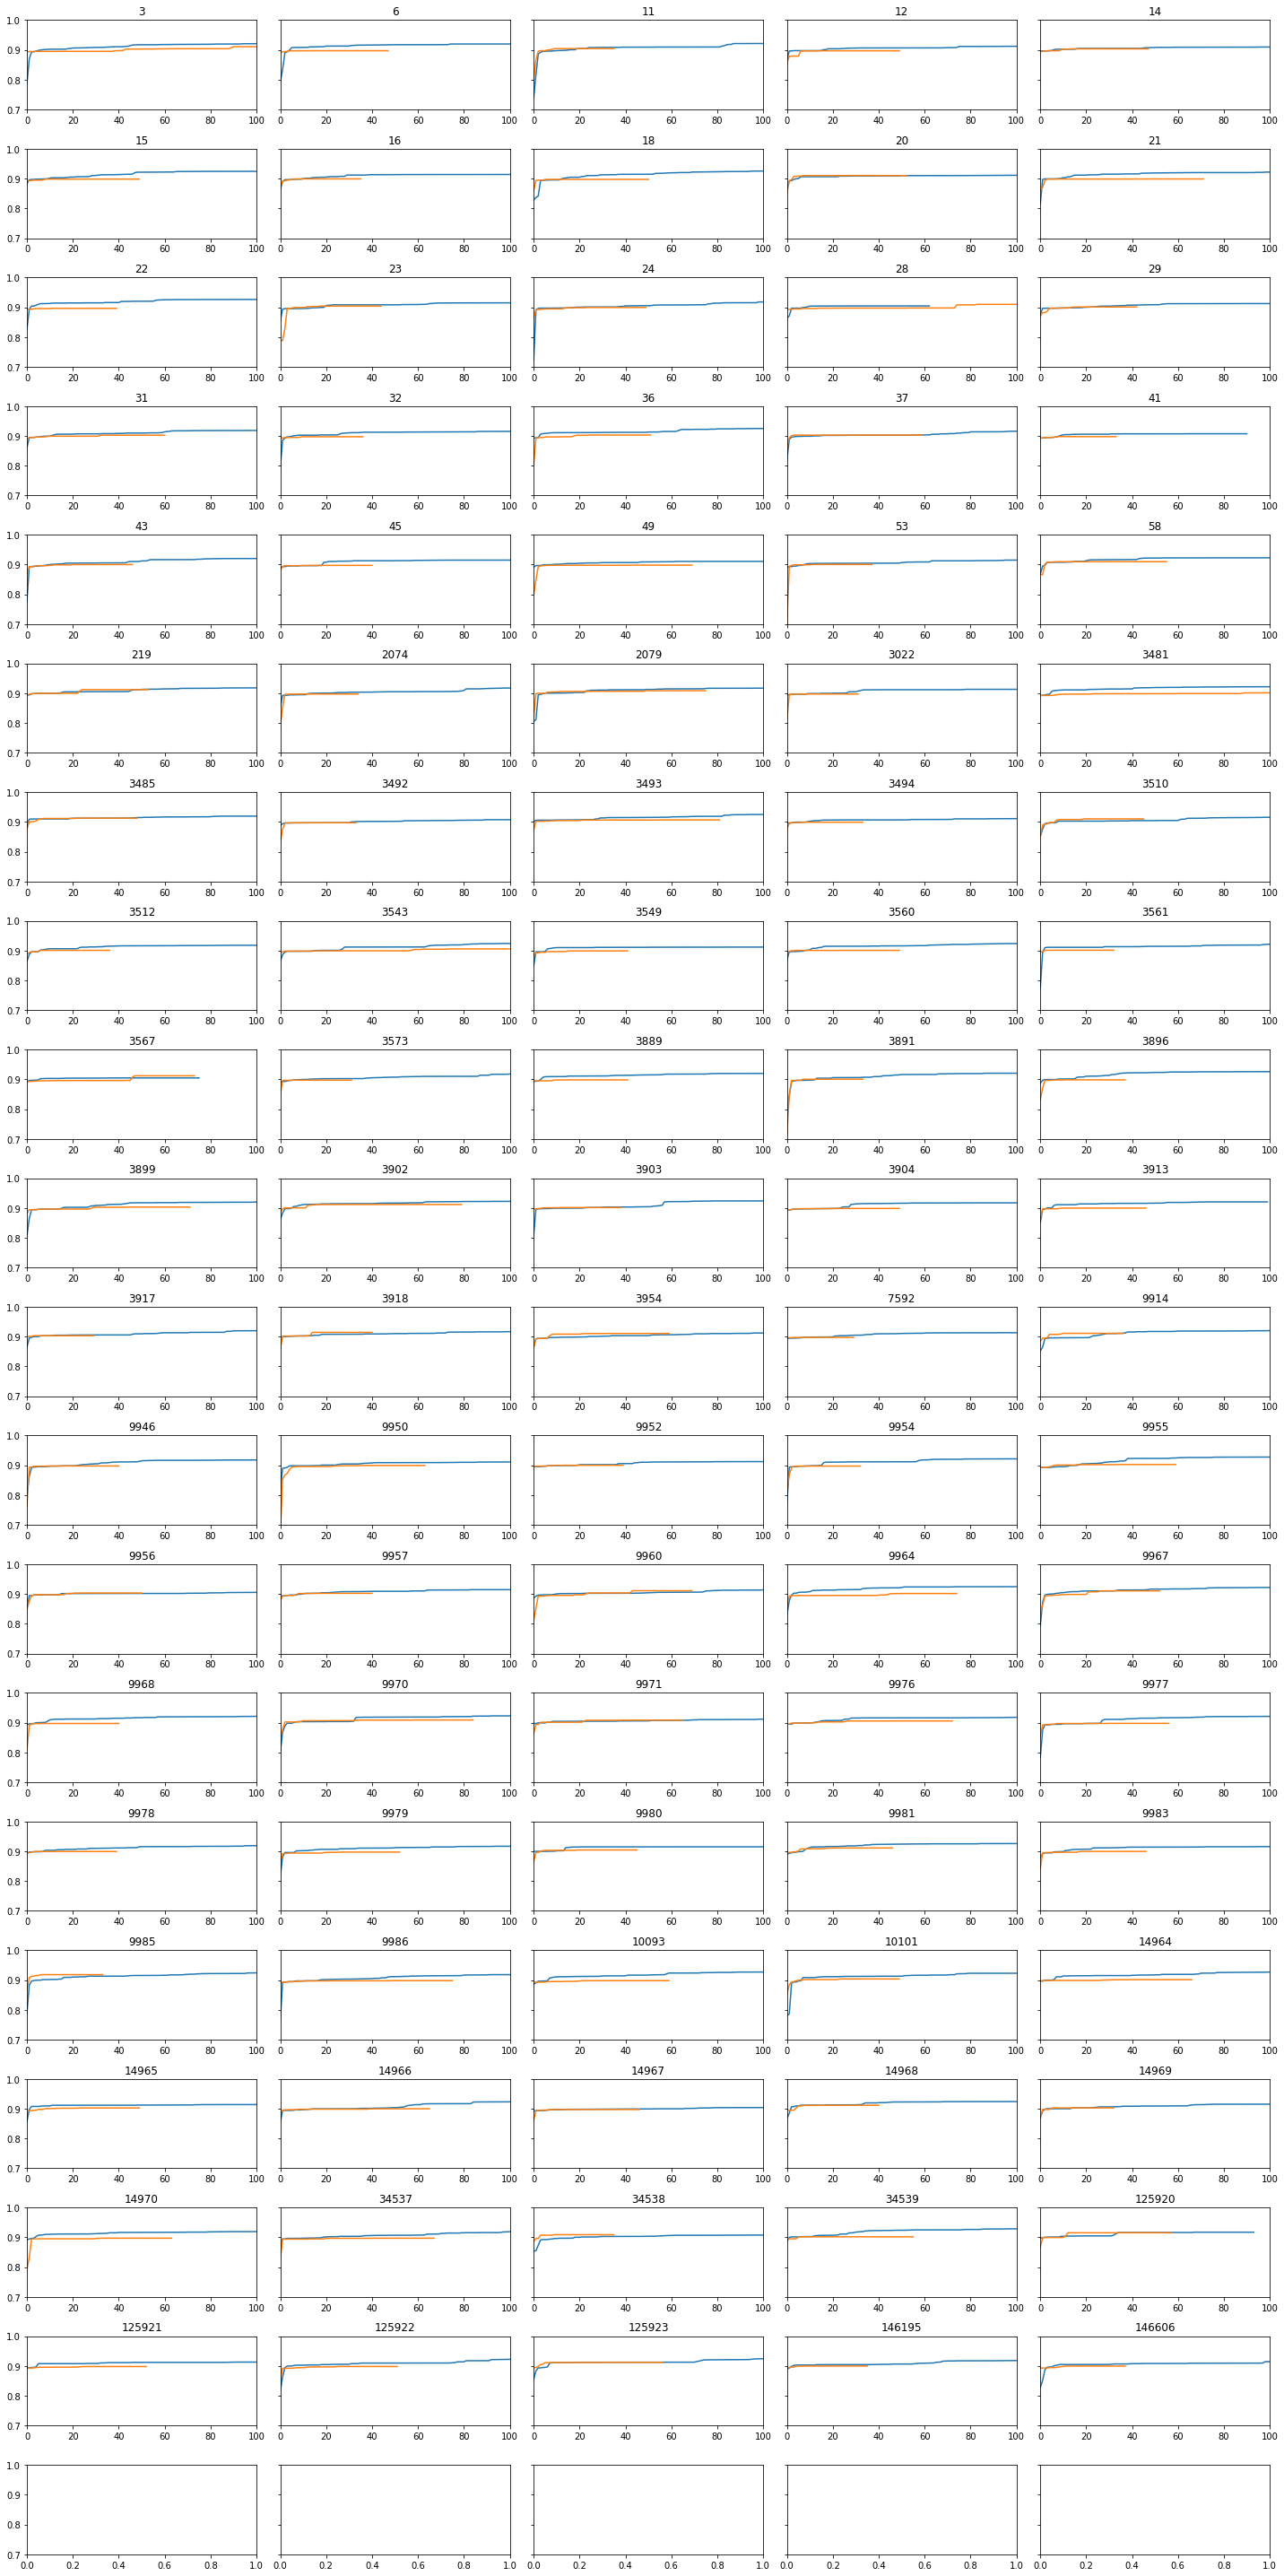

In [75]:
n_rows, n_cols = 20, 5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 40), sharey=True)
for i, (result, result2) in enumerate(zip(results, results2)):
    ax = axes[i//n_cols, i % n_cols]
    plot_result(result, ax)
    plot_result(result2, ax)
fig.tight_layout()

The top scoring expressions per task. First `C` then `gamma`. Overall:

In [70]:
for result in results2:
    print(result.task, result.top_five_expressions[0])

3 truediv(6.0, min(mcp, xvar)), mkd
6 16.0, truediv(mkd, pow(xvar, mcp))
11 sub(16.0, 5.0), truediv(mkd, xvar)
12 sub(mul(truediv(m, xvar), 4.0), m), mkd
14 truediv(max(m, 7.0), xvar), mkd
15 add(m, 10.0), truediv(mkd, xvar)
16 7.0, truediv(mkd, sub(xvar, mkd))
18 7.0, truediv(mkd, xvar)
20 add(m, add(10.0, m)), mkd
21 truediv(max(m, 7.0), xvar), mkd
22 16.0, truediv(mkd, xvar)
23 truediv(add(4.0, m), xvar), mkd
24 16.0, truediv(mkd, add(xvar, xvar))
28 7.0, truediv(mkd, xvar)
29 sub(16.0, 3.0), truediv(mkd, xvar)
31 sub(16.0, mcp), truediv(mkd, xvar)
32 truediv(8.0, truediv(xvar, 0.801346728048591)), mkd
36 add(add(add(add(add(16.0, truediv(rc, xvar)), truediv(rc, xvar)), truediv(rc, xvar)), truediv(rc, xvar)), truediv(0.36093510408288276, xvar)), mkd
37 16.0, truediv(mkd, xvar)
41 16.0, truediv(mkd, add(xvar, xvar))
43 add(truediv(rc, xvar), add(truediv(rc, xvar), add(truediv(rc, xvar), add(m, truediv(3.0, xvar))))), mkd
45 7.0, truediv(mkd, xvar)
49 add(10.0, m), truediv(mkd, xvar)


Top-scoring expressions the least amount of operators:

In [78]:
for result in results2:
    _, expr = min([(len(expr.split('(')), expr) for expr in result.top_five_expressions])
    print(result.task, expr)

3 max(p, 16.0), mkd
6 p, mkd
11 16.0, truediv(mkd, xvar)
12 p, mkd
14 6.0, truediv(mkd, xvar)
15 8.0, truediv(mkd, xvar)
16 16.0, truediv(min(mkd, 0.125), xvar)
18 add(m, p), mkd
20 if_gt(mcp, n, mkd, 5.0), truediv(mkd, xvar)
21 p, mkd
22 7.0, truediv(mkd, xvar)
23 6.0, truediv(mkd, xvar)
24 add(m, 16.0), mkd
28 16.0, mkd
29 16.0, truediv(mkd, xvar)
31 16.0, truediv(mkd, xvar)
32 add(10.0, 16.0), mkd
36 32.0, mkd
37 16.0, truediv(mkd, xvar)
41 if_gt(16.0, rc, 16.0, 32.0), mkd
43 16.0, mkd
45 16.0, mkd
49 16.0, mkd
53 16.0, mkd
58 16.0, mkd
219 16.0, mkd
2074 32.0, mkd
2079 add(m, pow(p, rc)), mkd
3022 16.0, mkd
3481 16.0, mkd
3485 8.0, truediv(mkd, xvar)
3492 32.0, mkd
3493 16.0, mkd
3494 16.0, mkd
3510 16.0, mkd
3512 16.0, if_gt(8.0, 0.6998648530047167, mkd, m)
3543 32.0, mkd
3549 16.0, mkd
3560 16.0, truediv(mkd, xvar)
3561 10.0, mkd
3567 16.0, mkd
3573 16.0, mkd
3889 32.0, mkd
3891 16.0, truediv(mkd, xvar)
3896 16.0, mkd
3899 16.0, mkd
3902 16.0, mkd
3903 16.0, truediv(mkd, xvar)
39

## 1.2 Poly

In [ ]:
results = parse_console_output("data/results/eo_svc_poly.txt")

The following plots show the internal fitness score. The internal fitness score is the average of scores predicted by the surrogate model across all tasks except the indicated one.

In [ ]:
n_rows, n_cols = 20, 5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 40), sharey=True)
for i, result in enumerate(results):
    ax = axes[i//n_cols, i % n_cols]
    plot_result(result, ax)
fig.tight_layout()

The top scoring expressions per task. The order is `C`, `gamma`, `degree`. Overall:

In [ ]:
for result in results:
    print(result.task, result.top_five_expressions[0])

Top-scoring expressions the least amount of operators:

In [ ]:
for result in results:
    _, expr = min([(len(expr.split('(')), expr) for expr in result.top_five_expressions])
    print(result.task, expr)

Here we noticed that it is problematic that `degree` is processed as a float. We could actually change this in our GP. It looks like almost all expressions should evaluate (floor to) to 1 though.

# 2. AdaBoost

**note**: The currently shown experiment was cut short. This was done because I currently run experiments locally, which is time consuming, while the results seem to be pretty stable, and consistent with an earlier version of an optimization trace. That said, it still covers ~80 datasets. Obviously we need to do a full rerun at some point, but given the results I think we should actually first collect a bigger metadataset.

In [ ]:
from visualization.output_parser import parse_console_output
results = parse_console_output("data/results/eo_ada.txt")

The following plots show the internal fitness score. The internal fitness score is the average of scores predicted by the surrogate model across all tasks except the indicated one.

In [ ]:
n_rows, n_cols = 20, 5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 40), sharey=True)
for i, result in enumerate(results):
    ax = axes[i//n_cols, i % n_cols]
    plot_result(result, ax)
fig.tight_layout()

Symbolic expressions for, in order, `learning_rate`, `n_estimators` and `base_estimator__max_depth`. Filter for minimum expression length.

In [ ]:
for result in results:
    _, expr = min([(len(expr.split('(')), expr) for expr in result.top_five_expressions])
    print(result.task, expr)

We often find:
 - learning rate: some form of expression in the range [0.75, 1]
 - n_estimators: n
 - max_depth: p
 

However, we should note that in our base experiments, the maximum `n_estimators` was 500, and maximum depth was `10`. So, any expression which always evaluates to be greater than those will be perceived to have the same effect as we use (non-extrapolating) Random Forests for our surrogate models. I think `n_estimators=500, max_depth=10` is an easy to find local optimum, but it arises arbitrarily from the construction of our metadataset. I think that additional experiments with higher `n_estimators` and `max_depth` would be required so that the surrogate model can model the response for more extreme values better (in which case hopefully always picking a really high estimator count such as `n` should be punished by a bad score).

That said, the current defaults are `learning_rate=1`, `n_estimators=50` and `max_depth=1`, so the suggested values are different.

# 3. Random Forest

In [ ]:
from visualization.output_parser import parse_console_output
results = parse_console_output("data/results/eo_rf.txt")

The following plots show the internal fitness score. The internal fitness score is the average of scores predicted by the surrogate model across all tasks except the indicated one.

In [ ]:
n_rows, n_cols = 20, 5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 40), sharey=True)
for i, result in enumerate(results):
    ax = axes[i//n_cols, i % n_cols]
    plot_result(result, ax)
fig.tight_layout()

Symbolic expressions for, in order, `learning_rate`, `n_estimators` and `base_estimator__max_depth`. Filter for minimum expression length.

In [ ]:
for result in results:
    _, expr = min([(len(expr.split('(')), expr) for expr in result.top_five_expressions])
    print(result.task, expr)

Interestingly, a lot of `0.27`. I don't know how to explain this value. This would be roughly `sqrt(p)` (sklearn default) for `p=13`, but we find it for e.g. `p=300` so I doubt it is related to `sqrt(p)`.

## 4. XGBoost Linear

In [5]:
from visualization.output_parser import parse_eo_console_output
results = parse_eo_console_output("data/results/eo_xgb_linear")

The following plots show the internal fitness score. The internal fitness score is the average of scores predicted by the surrogate model across all tasks except the indicated one.

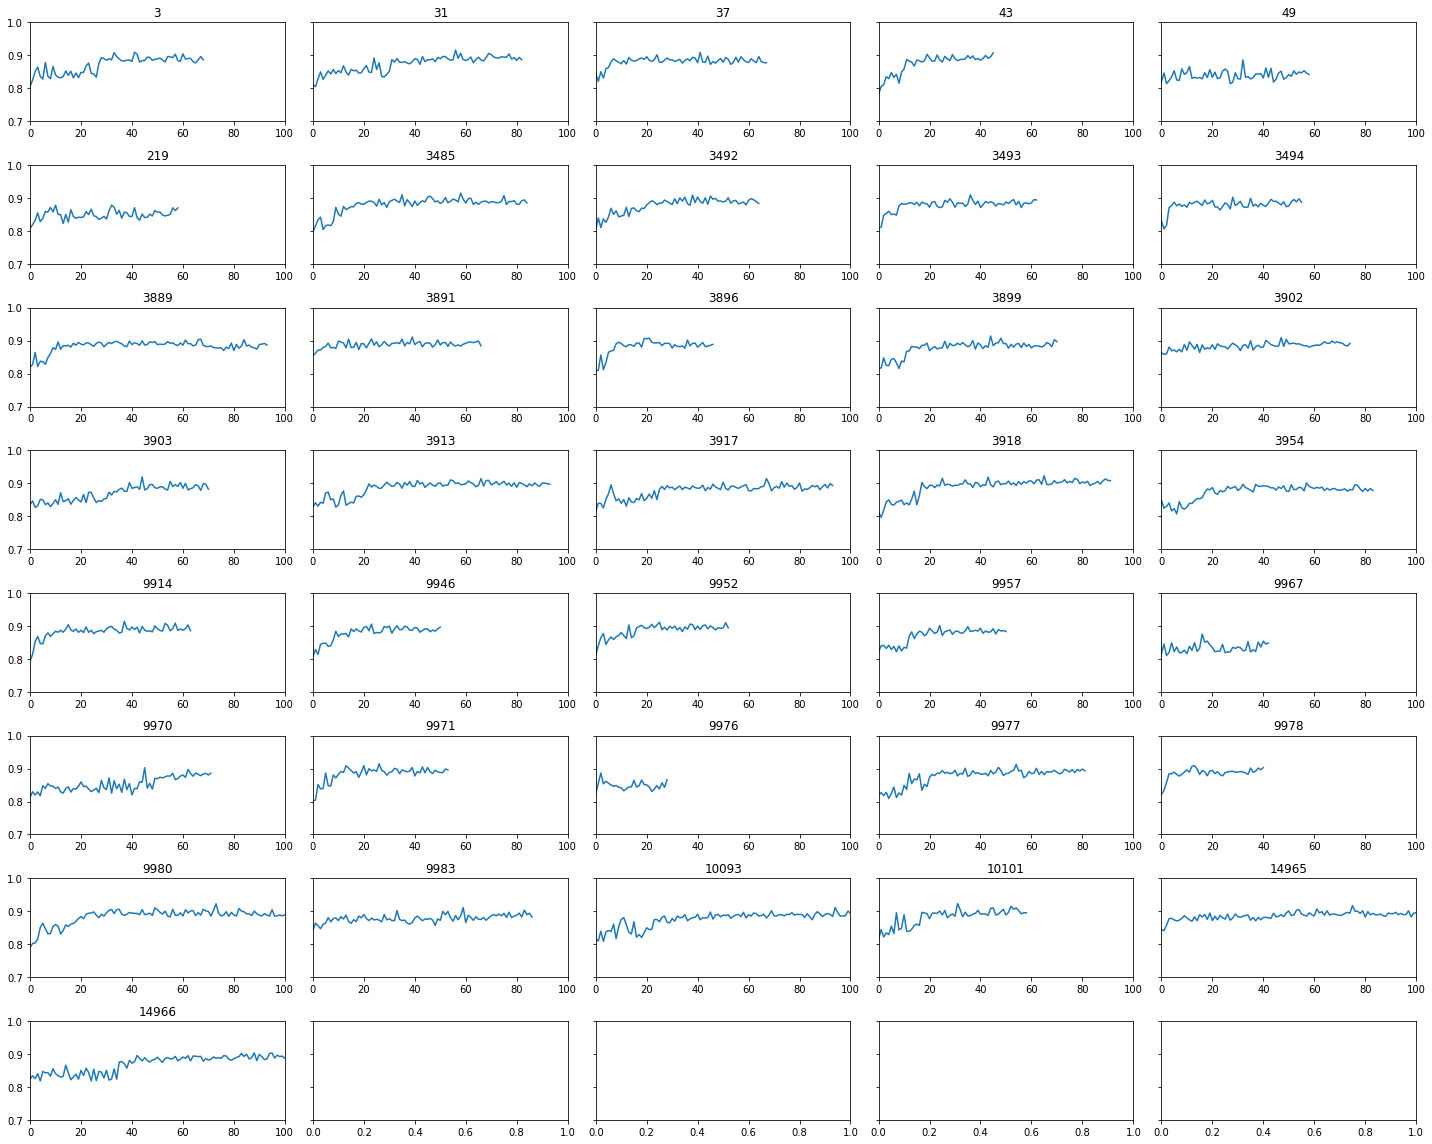

In [6]:
n_rows, n_cols = 8, 5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 16), sharey=True)
for i, result in enumerate(results):
    ax = axes[i//n_cols, i % n_cols]
    plot_result(result, ax)
fig.tight_layout()

The top scoring expressions per task. First `C` then `gamma`. Overall:

In [7]:
for result in results:
    print(result.task, result.top_five_expressions[0])

3 3.0, add(add(mkd, mkd), mkd), mkd, mul(n, n), mcp
31 3.0, mul(mkd, 3.0), mkd, pow(n, 5.0), mul(mkd, 5.0)
37 3.0, truediv(mul(3.0, mkd), 0.5631169819129499), 0.21179212045310514, n, 0.8846024695069756
43 2.0, add(min(n, mkd), add(min(n, mkd), add(mkd, mkd))), 0.0625, truediv(n, mkd), 0.8609459052008218
49 10.0, mcp, xvar, n, mcp
219 if_gt(mcp, 0.8257152100852357, 9.0, m), 9.0, mcp, n, 0.8257152100852357
3485 m, truediv(mkd, 0.2640640493118739), mkd, mul(poly_gt(mkd, p), n), mkd
3492 3.0, mul(3.0, mkd), mul(mcp, mkd), mul(3.0, n), min(mcp, truediv(0.8813094458287217, 3.0))
3493 3.0, truediv(add(mkd, mkd), 0.40087666520345333), if_gt(mkd, p, truediv(rc, 0.3622967956229568), mkd), n, mcp
3494 m, mul(mkd, 7.0), mkd, n, m
3889 3.0, add(mkd, mkd), mkd, mul(3.0, n), 0.5459055018843317
3891 add(0.03125, 3.0), mul(mkd, 6.0), mkd, n, 0.8831619643537122
3896 m, truediv(mkd, 0.29990584032802603), mul(mcp, 0.00390625), pow(n, 4.0), mul(mcp, 0.00390625)
3899 3.0, add(0.00390625, add(mkd, mkd)), 0.0

Top-scoring expressions the least amount of operators:

In [8]:
for result in results:
    _, expr = min([(len(expr.split('(')), expr) for expr in result.top_five_expressions])
    print(result.task, expr)

3 3.0, add(mkd, mkd), mkd, mul(n, n), mcp
31 3.0, mul(mkd, 3.0), mcp, pow(n, 5.0), xvar
37 3.0, truediv(mul(3.0, mkd), 0.5631169819129499), 0.21179212045310514, n, 0.3388135660790871
43 m, add(mkd, add(mkd, mkd)), mkd, mul(n, p), mkd
49 10.0, mcp, xvar, n, mcp
219 if_gt(mcp, 0.8257152100852357, 9.0, m), 9.0, mcp, n, 0.8257152100852357
3485 m, truediv(mkd, 0.2640640493118739), mkd, mul(poly_gt(mkd, p), n), mkd
3492 3.0, mul(3.0, mkd), mkd, mul(3.0, n), truediv(0.8813094458287217, m)
3493 3.0, truediv(mkd, 0.3622967956229568), mkd, n, 0.03449120312965981
3494 m, mul(mkd, 6.0), mcp, n, xvar
3889 3.0, add(mkd, mkd), mkd, mul(3.0, n), 0.5459055018843317
3891 3.0, mul(mkd, 10.0), mkd, n, xvar
3896 m, truediv(mkd, 0.29990584032802603), 0.00390625, pow(n, 4.0), 0.00390625
3899 3.0, add(0.00390625, add(mkd, mkd)), 0.00390625, n, 0.3399581045303257
3902 3.0, add(mkd, mkd), xvar, mul(3.0, n), mkd
3903 pow(4.0, mcp), mul(mkd, 4.0), mkd, n, mkd
3913 3.0, add(mkd, mkd), 0.015625, mul(n, n), 0.173508

----
**note**: Everything below is scratchpad and should be ignored

----